In [1]:
import tensorflow
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, MaxPooling2D, Flatten, Conv2D, Input,BatchNormalization
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt


In [2]:
(X_train,Y_train),(X_test,Y_test) = keras.datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 13s 0us/step


In [3]:
print(f"Training Image set : {X_train.shape}")
print(f"Testing Image set : {X_test.shape}")
Y_train = to_categorical(Y_train)
Y_test = to_categorical(Y_test)
print(f"Training Label set : {Y_train.shape}")
print(f"Testing Label set : {Y_test.shape}")

Training Image set : (50000, 32, 32, 3)
Testing Image set : (10000, 32, 32, 3)
Training Label set : (50000, 10)
Testing Label set : (10000, 10)


In [ ]:
Model = Sequential()

# input Layer
Model.add(Input((32,32,3)))

# First Block
Model.add(Conv2D(filters=64,kernel_size=3,strides=1,activation='relu'))
Model.add(Conv2D(filters=64,kernel_size=3,strides=1,activation='relu'))
Model.add(MaxPooling2D(pool_size=(2,2),strides=2))

# Second Block
Model.add(Conv2D(filters=128,kernel_size=3,strides=1,activation='relu'))
Model.add(Conv2D(filters=128,kernel_size=3,strides=1,activation="relu"))
Model.add(MaxPooling2D(pool_size=(2,2),strides=2))

Model.add(Flatten())

Model.add(Dense(4096,activation="relu"))
Model.add(Dense(4096,activation="relu"))
Model.add(Dense(10,activation="softmax"))

In [ ]:
Model.compile(
    optimizer="adam",
    loss="BinaryCrossentropy",
    metrics=["Accuracy"]
)

In [4]:
train_generator = ImageDataGenerator(
    rescale = 1./255,
    rotation_range=15,
    width_shift_range = 0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    zoom_range = 0.1,
    fill_mode = 'nearest'
)

test_generator = ImageDataGenerator(rescale=1./255)

In [5]:
Train_gen_data = train_generator.flow(X_train,Y_train,batch_size=32,shuffle=True)
Test_gen_data = test_generator.flow(X_test,Y_test,batch_size=32,shuffle=False)

In [ ]:
Model.fit(
    Train_gen_data,
    epochs=5,
    validation_data=Test_gen_data
)

Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 41s 26ms/step - Accuracy: 0.8396 - loss: 0.0804 - val_Accuracy: 0.8101 - val_loss: 0.1035
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 40s 26ms/step - Accuracy: 0.8462 - loss: 0.0775 - val_Accuracy: 0.8174 - val_loss: 0.0986
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 40s 26ms/step - Accuracy: 0.8458 - loss: 0.0774 - val_Accuracy: 0.8168 - val_loss: 0.0987
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 41s 26ms/step - Accuracy: 0.8492 - loss: 0.0767 - val_Accuracy: 0.8305 - val_loss: 0.0919
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 40s 25ms/step - Accuracy: 0.8560 - loss: 0.0738 - val_Accuracy: 0.8251 - val_loss: 0.0959


# VGG - 16 Architecture
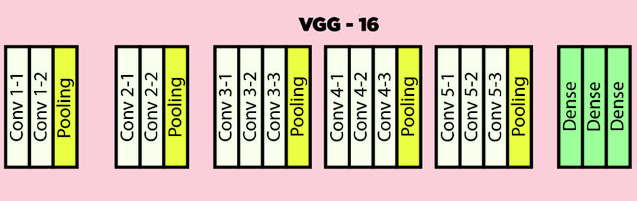

In [ ]:
Model = Sequential()

# input Layer
Model.add(Input((224,224,3)))

# First Block
Model.add(Conv2D(filters=64,kernel_size=3,strides=1,activation='relu'))
Model.add(Conv2D(filters=64,kernel_size=3,strides=1,activation='relu'))
Model.add(MaxPooling2D(pool_size=(2,2),strides=2))

# Second Block
Model.add(Conv2D(filters=128,kernel_size=3,strides=1,activation='relu'))
Model.add(Conv2D(filters=128,kernel_size=3,strides=1,activation="relu"))
Model.add(MaxPooling2D(pool_size=(2,2),strides=2))

# Third Block
Model.add(Conv2D(filters=256,kernel_size=3,strides=1,activation="relu"))
Model.add(Conv2D(filters=256,kernel_size=3,strides=1,activation="relu"))
Model.add(Conv2D(filters=256,kernel_size=3,strides=1,activation="relu"))
Model.add(MaxPooling2D(pool_size=(2,2),strides=2))

# Forth Block
Model.add(Conv2D(filters=512,kernel_size=3,strides=1,activation="relu"))
Model.add(Conv2D(filters=512,kernel_size=3,strides=1,activation="relu"))
Model.add(Conv2D(filters=512,kernel_size=3,strides=1,activation="relu"))
Model.add(MaxPooling2D(pool_size=(2,2),strides=2))

# Fifth Block
Model.add(Conv2D(filters=512,kernel_size=3,strides=1,activation="relu"))
Model.add(Conv2D(filters=512,kernel_size=3,strides=1,activation="relu"))
Model.add(Conv2D(filters=512,kernel_size=3,strides=1,activation="relu"))
Model.add(MaxPooling2D(pool_size=(2,2),strides=2))

Model.add(Flatten())

Model.add(Dense(4096,activation="relu"))
Model.add(Dense(4096,activation="relu"))
Model.add(Dense(10,activation="softmax"))


# Transfer Learning Using VGG -16


1.   Using Feature extraction
2.   Using Fine Tuning



In [6]:
from tensorflow.keras.applications import vgg16

In [7]:
(X_train,Y_train),(X_test,Y_test) = tensorflow.keras.datasets.cifar10.load_data()

In [8]:
vgg_conv_layers = vgg16.VGG16(
    weights="imagenet",
    include_top = False,
    input_shape = (32,32,3)
)

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [9]:
vgg_conv_layers.trainable = True
vgg_conv_layers.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 32, 32, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 32, 32, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 16, 16, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 16, 16, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 8, 8, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 8, 8, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 8, 8, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 4, 4, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 2, 2, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 2, 2, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 2, 2, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 1, 1, 512)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

In [10]:
def unfreeze_model(model):
  for layer in model.layers:
    if "block5" in layer.name:
      layer.trainable = True
    else:
      layer.trainable = False
      print(layer)
unfreeze_model(vgg_conv_layers)
vgg_conv_layers.summary()

<InputLayer name=input_layer, built=True>
<Conv2D name=block1_conv1, built=True>
<Conv2D name=block1_conv2, built=True>
<MaxPooling2D name=block1_pool, built=True>
<Conv2D name=block2_conv1, built=True>
<Conv2D name=block2_conv2, built=True>
<MaxPooling2D name=block2_pool, built=True>
<Conv2D name=block3_conv1, built=True>
<Conv2D name=block3_conv2, built=True>
<Conv2D name=block3_conv3, built=True>
<MaxPooling2D name=block3_pool, built=True>
<Conv2D name=block4_conv1, built=True>
<Conv2D name=block4_conv2, built=True>
<Conv2D name=block4_conv3, built=True>
<MaxPooling2D name=block4_pool, built=True>


Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 32, 32, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 32, 32, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 16, 16, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 16, 16, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 8, 8, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 8, 8, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 8, 8, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 4, 4, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 2, 2, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 2, 2, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 2, 2, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 1, 1, 512)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 7,079,424 (27.01 MB)

 Non-trainable params: 7,635,264 (29.13 MB)

In [11]:
Model = Sequential()
Model.add(Input(shape=(32,32,3)))
Model.add(vgg_conv_layers)
Model.add(Flatten())
Model.add(Dense(units=128,activation='relu'))
Model.add(Dense(units=256,activation='relu'))
Model.add(Dense(units=10,activation='softmax'))

In [12]:
Model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 1, 1, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,815,946 (56.52 MB)

 Trainable params: 7,180,682 (27.39 MB)

 Non-trainable params: 7,635,264 (29.13 MB)

In [13]:
Model.compile(
    optimizer='adam',
    metrics = ['Accuracy'],
    loss = "BinaryCrossentropy"
)

In [15]:
Hist = Model.fit(
    Train_gen_data,
    epochs = 20,
    validation_data = Test_gen_data
)

Epoch 1/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 40s 26ms/step - Accuracy: 0.7013 - loss: 0.1414 - val_Accuracy: 0.7170 - val_loss: 0.1375
Epoch 2/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 40s 26ms/step - Accuracy: 0.7131 - loss: 0.1375 - val_Accuracy: 0.6992 - val_loss: 0.1423
Epoch 3/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 41s 26ms/step - Accuracy: 0.7214 - loss: 0.1332 - val_Accuracy: 0.7242 - val_loss: 0.1309
Epoch 4/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 40s 26ms/step - Accuracy: 0.7264 - loss: 0.1296 - val_Accuracy: 0.7319 - val_loss: 0.1290
Epoch 5/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 40s 25ms/step - Accuracy: 0.7368 - loss: 0.1279 - val_Accuracy: 0.7365 - val_loss: 0.1275
Epoch 6/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 40s 26ms/step - Accuracy: 0.7382 - loss: 0.1249 - val_Accuracy: 0.7463 - val_loss: 0.1239
Epoch 7/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 41s 26ms/step - Accuracy: 0.7430 - loss: 0.1232 - val_Accuracy: 0.7343 - val_loss: 0.1349
Epoch 8/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 40s 26ms/step - Accuracy: 0.7458 -

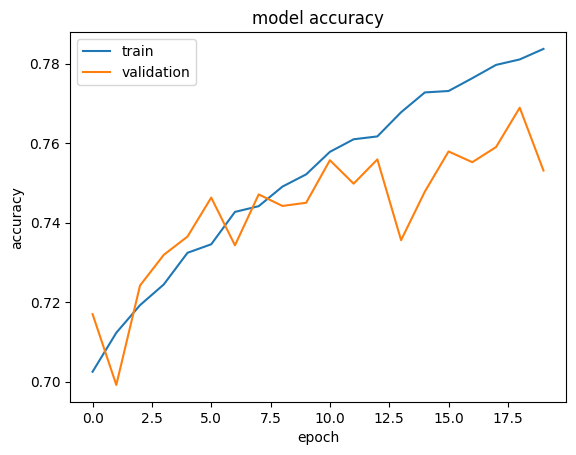

In [25]:
def plot_hist(hist):
    plt.plot(hist.history["Accuracy"])
    plt.plot(hist.history["val_Accuracy"])
    plt.title("model accuracy")
    plt.ylabel("accuracy")
    plt.xlabel("epoch")
    plt.legend(["train", "validation"], loc="upper left")
    plt.show()


plot_hist(Hist)